In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def shuffle_lists(lst, lst2):
    n = len(lst2)
    for i in range(n - 1, 0, -1):
        j = random.randint(0, i)
        lst[i], lst[j] = np.copy(lst[j]), np.copy(lst[i])
        lst2[i], lst2[j] = lst2[j], lst2[i]
    return lst, lst2

def shuffle(data, target):
    # Hacer un shuffle de las listas
    dataRand, targetRand = shuffle_lists(data, target)
    return dataRand, targetRand
# Leer el archivo de texto
class Data:
    def __init__(self):
        self._data = None
        self._target = None
        self._randomData = None
        self._randomTarget = None
        
    # Metodos getters
    def getRandomData(self):
        return self._randomData
    
    def getRandomTarget(self):
        return self._randomTarget
    
    # Funcion para leer el archivo y guardar las imagenes y sus clases
    def load_data(self):
        with open("optdigits.tes", "r") as datos:
            valores = []
            for linea in datos:
                valores.append([x for x in linea.strip().split(",")])
                
            # Crear matriz para guardar los valores de data
            data = np.zeros((len(valores), 64))
            for i in range(len(valores)):
                data[i] = valores[i][:64]
                
            self._data = np.copy(data)
            
            # Crear matriz para guardar los valores de target (clases)
            target = np.zeros((len(valores)))
            for i in range(len(valores)):
                target[i] = valores[i][64]
                
            self._target = np.copy(target)
            
            
        print("Se cargaron los datos")
    
    # Funcion para aleatorizar la informacion guardada
    def randomizer(self):
        # Crear matriz auxiliar para permutar filas de la matriz de datos
        numDatos, numChar = self._data.shape
        
        randomData = np.copy(self._data)
        # Crear arreglo auxiliar para permutar clases
        numTarget = self._target.shape
        
        randomTarget = np.copy(self._target)
        
        # Tomar un valor random desde 0 hasta numDatos y mezclar
        a, b = shuffle(randomData, randomTarget)
        
        # Guardar la matriz con filas intercambiadas y el arreglo con datos intercambiados
        self._randomData = np.copy(a)
        self._randomTarget = np.copy(b)
        print("Datos aleatorizados")

In [3]:
data = Data()
data.load_data()
data.randomizer()

# Devuelve los imagenes aleatorias con las que se va a trabajar
datos = data.getRandomData()

# Devuelve las clases de las imagenes aleatorizadas
target = data.getRandomTarget()
df = pd.DataFrame(datos)
df["target"] = target

# Se separan los datos de prueba (500) y los datos de entrenamiento (1000)
df_train, df_test = df[:1000], df[1000:1500]

# Se preparan los datos de train y los datos de test
X_train = df_train.drop(columns=["target"]).values
y_train = df_train["target"].values

X_test = df_test.drop(columns=["target"]).values
y_test = df_test["target"].values

Se cargaron los datos
Datos aleatorizados


In [4]:
# Funcion para calcular la distancia euclideana
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class knnAlgorithm:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X # Imagenes
        self.y_train = y # Clases
        
    def predict(self, X):
        print("Preparando predicciones")
        
        # Obtener la distancia a todos los puntos
        distances = np.array([euc_dist(X, x_t) for x_t in self.X_train])
            
        # Ordenar las distancias y devolver solo los primeros k vecinos
        sort_distance = np.argsort(distances)[: self.k]

        # Guardar las distancias en un arreglo
        knn = self.y_train[sort_distance]

        # Contar las clases más coumnes
        label, counts = np.unique(knn, return_counts = True)

        y_pred = label[np.argmax(counts)]
        return y_pred

In [5]:
model = knnAlgorithm(k=3)
model.fit(X_train, y_train)

In [6]:
# Funcion para convertir a escala de grises
def escala_grises_precisa(imagen):
    wid, hght, channel = imagen.shape
    matriz = np.zeros((wid,hght))
    for i in range(hght-1):
        for j in range(wid-1):
            pixel = imagen[i][j]
            gris = (pixel[0] * 0.21) + (pixel[1] * 0.72) + (pixel[2] * 0.07)
            matriz[i][j] = gris
    return matriz

In [7]:
# Redimensionar a 8x8
def subsampling(image, new_wid, new_hght):
    
    wid, hght, channel= image.shape

    # Escala
    scale_x = wid / new_wid
    scale_y = hght / new_hght

    subsampled_image = np.zeros((new_wid, new_hght, 3), np.uint8)

    for y in range(new_hght):
        for x in range(new_wid):
            
            original_x = int(x * scale_x)
            original_y = int(y * scale_y)

            pixel_r = image[original_x][original_y][0]
            pixel_g = image[original_x][original_y][1]
            pixel_b = image[original_x][original_y][2]

            subsampled_image[x][y][0] = pixel_r
            subsampled_image[x][y][1] = pixel_g
            subsampled_image[x][y][2] = pixel_b

    return subsampled_image

In [8]:
def norm0_16(imagen):
    wid, hght = imagen.shape
    newImage = np.zeros((wid, hght), np.uint8)

    # 
    for i in range(wid):
        for j in range(hght):
            newImage[i][j] = np.ceil(imagen[i][j] * 0.06)

    return newImage

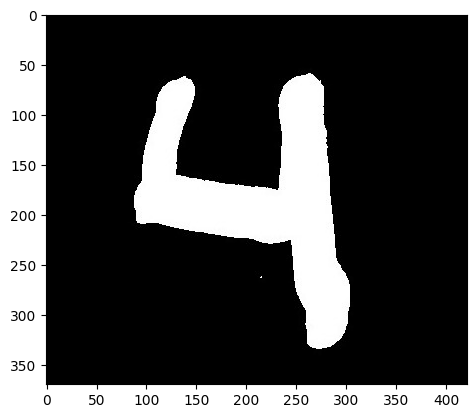

In [25]:
import cv2

# Convertir imagenes de 0 a 255  a 0 a 16
imagen = cv2.imread('Suma/suma.jpeg', 1)
img = np.copy(imagen)
clase = 4
plt.imshow(img)

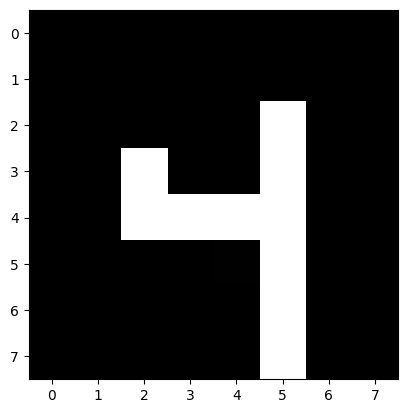

In [26]:
new_wid = 8
new_hght = 8

subsampled_img = subsampling(img, new_wid, new_hght)
plt.imshow(subsampled_img, cmap= plt.cm.gray_r, interpolation="nearest")

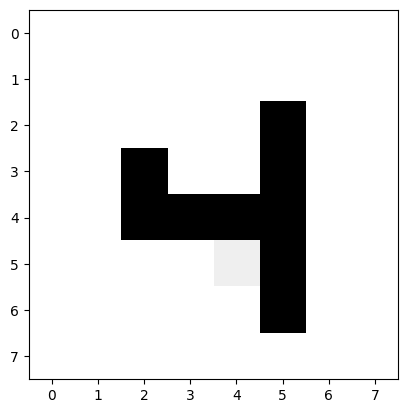

In [27]:
imagen_gris = escala_grises_precisa(subsampled_img)
# Pasar a 0 a 16
imagen0_16 = norm0_16(imagen_gris)

# Mostrar imagen
plt.imshow(imagen0_16, cmap=plt.cm.gray_r, interpolation="nearest")

In [28]:
vector = imagen0_16.flatten()
print(vector)
print(vector.shape)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0
  0  0 16  0  0 16  0  0  0  0 16 16 16 16  0  0  0  0  0  0  1 16  0  0
  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
(64,)


Preparando predicciones
El numero 4 fue clasificado como 4.0


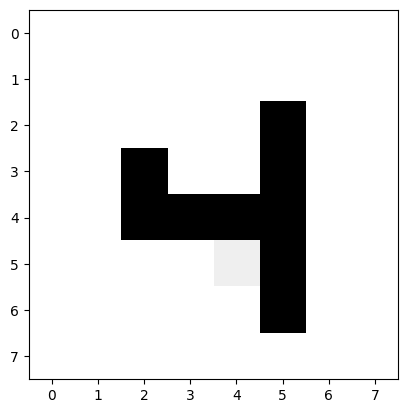

In [29]:
y_pred = model.predict(vector)

print(f"El numero {clase} fue clasificado como {y_pred}")

datos_res = np.reshape(vector, (8,8))
plt.imshow(datos_res, cmap= plt.cm.gray_r, interpolation="nearest")